# Proyek Analisis Data:
- **Nama:** Ricardo Situmorang
- **Email:** ricardosimor2@gmail.com
- **ID Dicoding:** ricardosimor

## Menentukan Pertanyaan Bisnis

- Kategori Produk apa yang memiliki review terbaik dan terburuk?
- Kategori Produk apa yang memiliki penjualan tertinggi dalam periode tertentu?
- Berapa Total Revenue yang didapatkan?
- Berapa banyak produk yang terjual?
- Berapa Total Order yang terjadi?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
products_df = pd.read_csv('products_dataset.csv', delimiter=",")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [3]:
orders_dataset_df = pd.read_csv('orders_dataset.csv', delimiter=",")
orders_dataset_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
order_reviews_dataset_df = pd.read_csv('order_reviews_dataset.csv', delimiter=",")
order_reviews_dataset_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [5]:
order_items_dataset_df = pd.read_csv('order_items_dataset.csv', delimiter=",")
order_items_dataset_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
product_category_name_translation_df = pd.read_csv('product_category_name_translation.csv', delimiter=",")
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [7]:
customers_df = pd.read_csv('customers_dataset.csv', delimiter=",")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Insight:**
- menyambungkan drive ke dalam google colab
- menginput data dari drive melalui library pandas

### Assessing Data

In [10]:
# Products Dataset
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [11]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [12]:
print("Jumlah Duplikasi:", products_df.duplicated().sum())

Jumlah Duplikasi: 0


In [13]:
# Orders Dataset
orders_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [14]:
orders_dataset_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [15]:
print("Jumlah Duplikasi:", orders_dataset_df.duplicated().sum())

Jumlah Duplikasi: 0


In [16]:
# Order Review Dataset
order_reviews_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [17]:
order_reviews_dataset_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [18]:
print("Jumlah Duplikasi:", order_reviews_dataset_df.duplicated().sum())

Jumlah Duplikasi: 0


In [19]:
order_reviews_dataset_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [20]:
# Order Items Dataset
order_items_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [21]:
order_items_dataset_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [22]:
print("Jumlah Duplikasi:", order_items_dataset_df.duplicated().sum())

Jumlah Duplikasi: 0


In [23]:
order_items_dataset_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [24]:
# Product Category Name Translation Dataset
product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [25]:
product_category_name_translation_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [26]:
print("Jumlah Duplikasi:", product_category_name_translation_df.duplicated().sum())

Jumlah Duplikasi: 0


In [27]:
# Customers Dataset
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [28]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [29]:
print("Jumlah Duplikasi:", customers_df.duplicated().sum())

Jumlah Duplikasi: 0


**Insight:**
- Products Dataset: Missing Values (product_category_name = 610)
- Orders Dataset : Missing Values (order_approved_at, order_delivered_carrier_date), namun ini bisa dibuang karena tidak sejalan dengan pertanyaan bisnis Kecuali kolom "order_delivered_customer_date".
- Order Review Dataset: Missing Values (review_comment_title, review_comment_message), namun ini bisa dibuang karena tidak sejalan dengan pertanyaan bisnis.
- Ada beberapa kolom pada data yang memang tidak sejalan dengan pertanyan bisnis dan harus di hapus/dibuang

### Cleaning Data

In [30]:
# Product Dataset
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [31]:
products_df.product_category_name.fillna('Unknown', inplace=True)
products_df.isna().sum()

C:\Users\Ricardo\AppData\Local\Temp\ipykernel_15812\4284928121.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df.product_category_name.fillna('Unknown', inplace=True)


product_id                      0
product_category_name           0
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [32]:
products_df.drop(columns=['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'], inplace=True)

In [33]:
products_df.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


In [34]:
# Product Category Name Translation Dataset
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [35]:
# Order Items Dataset
order_items_dataset_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [36]:
order_items_dataset_df.drop(columns=['shipping_limit_date'], inplace=True)

In [37]:
# Order Dataset
orders_dataset_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [38]:
orders_dataset_df.drop(columns=['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date'	,'order_estimated_delivery_date'], inplace=True)

In [39]:
# Order Review Dataset
order_reviews_dataset_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [40]:
order_reviews_dataset_df.drop(columns=['review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp'], inplace=True)

In [41]:
# Customer Dataset
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [42]:
customers_df.drop(columns=['customer_unique_id', 'customer_zip_code_prefix', 'customer_state'], inplace=True)

**Insight:**
- Dataset Products yang missing value pada kolom product_category_name diganti dengan "Unknown".
- Beberapa kolom pada semua dataset yang tidak sesuai dengan pertanyaan bisnis telah dihilangkan atau didrop.

 ## Merge Data

In [44]:
# Mengganti Nama Category Product dengan dataset Product Category Name Translation
products_df['product_category_name'] = products_df['product_category_name'].replace(product_category_name_translation_df.set_index('product_category_name')['product_category_name_english'])
products_df.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,art
2,96bd76ec8810374ed1b65e291975717f,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,baby
4,9dc1a7de274444849c219cff195d0b71,housewares


In [45]:
# Menggabungkan Dataset Products dan Order Items
products_orderitems_df = pd.merge(
    left = products_df,
    right = order_items_dataset_df,
    how = 'inner',
    left_on = 'product_id',
    right_on = 'product_id'
)
products_orderitems_df.head()

,product_id,product_category_name,order_id,order_item_id,seller_id,price,freight_value
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,10.91,7.39
1,3aa071139cb16b67ca9e5dea641aaa2f,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,248.00,17.99
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,79.80,7.82
3,cef67bcfe19066a932b7673e239eb23d,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,112.30,9.54
4,9dc1a7de274444849c219cff195d0b71,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,37.90,8.29


In [46]:
# Menggabungkan Dataset Products_orderitems dan Order Reviews
product_reviews_df = pd.merge(
    left = products_orderitems_df,
    right = order_reviews_dataset_df,
    how = 'inner',
    left_on = 'order_id',
    right_on = 'order_id'
)
product_reviews_df.head()

,product_id,product_category_name,order_id,order_item_id,seller_id,price,freight_value,review_id,review_score
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,10.91,7.39,d71da8fd8c6e3adef26be965f065b8a1,5
1,3aa071139cb16b67ca9e5dea641aaa2f,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,248.00,17.99,19866247db89845ef558ef19a6c26fcd,5
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,79.80,7.82,32921b4e09c9a19d61fe46ce04231b84,5
3,cef67bcfe19066a932b7673e239eb23d,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,112.30,9.54,70949d129965fb1ee32aaccec720a19e,1
4,9dc1a7de274444849c219cff195d0b71,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,37.90,8.29,74c9c7d0bc153bbbc92e4c1597b8ba55,5


In [47]:
# Menggabungkan Dataset Product_Reviews dan Dataset Order
product_reviews_orders_df = pd.merge(
    left = product_reviews_df,
    right = orders_dataset_df,
    how = 'inner',
    left_on = 'order_id',
    right_on = 'order_id'
  )
product_reviews_orders_df.head()

,product_id,product_category_name,order_id,order_item_id,seller_id,price,freight_value,review_id,review_score,customer_id,order_status,order_delivered_customer_date
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,10.91,7.39,d71da8fd8c6e3adef26be965f065b8a1,5,f8a3e963a310aa58b60a5b1fed5bceb5,delivered,2018-04-27 16:42:17
1,3aa071139cb16b67ca9e5dea641aaa2f,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,248.00,17.99,19866247db89845ef558ef19a6c26fcd,5,03fc97548af8f58fefc768d12b546c9c,delivered,2018-02-16 13:27:08
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,79.80,7.82,32921b4e09c9a19d61fe46ce04231b84,5,e41819d1c95c12c9ce495b630eab8aee,delivered,2018-07-11 23:24:16
3,cef67bcfe19066a932b7673e239eb23d,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,112.30,9.54,70949d129965fb1ee32aaccec720a19e,1,322162b5ca010c2b059cb5224dd818b1,delivered,2018-08-06 15:14:32
4,9dc1a7de274444849c219cff195d0b71,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,37.90,8.29,74c9c7d0bc153bbbc92e4c1597b8ba55,5,c11c31965ff02cc1d7132df8edfcbc22,delivered,2018-04-13 22:41:44


In [48]:
# Menggabung Dataset Product_Reviews_Orders dan Dataset Customer
all_orders_df = pd.merge(
    left = product_reviews_orders_df,
    right = customers_df,
    how = 'inner',
    left_on = 'customer_id',
    right_on = 'customer_id'
)
all_orders_df.head()

,product_id,product_category_name,order_id,order_item_id,seller_id,price,freight_value,review_id,review_score,customer_id,order_status,order_delivered_customer_date,customer_city
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,10.91,7.39,d71da8fd8c6e3adef26be965f065b8a1,5,f8a3e963a310aa58b60a5b1fed5bceb5,delivered,2018-04-27 16:42:17,mogi-guacu
1,3aa071139cb16b67ca9e5dea641aaa2f,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,248.00,17.99,19866247db89845ef558ef19a6c26fcd,5,03fc97548af8f58fefc768d12b546c9c,delivered,2018-02-16 13:27:08,rio de janeiro
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,79.80,7.82,32921b4e09c9a19d61fe46ce04231b84,5,e41819d1c95c12c9ce495b630eab8aee,delivered,2018-07-11 23:24:16,sao paulo
3,cef67bcfe19066a932b7673e239eb23d,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,112.30,9.54,70949d129965fb1ee32aaccec720a19e,1,322162b5ca010c2b059cb5224dd818b1,delivered,2018-08-06 15:14:32,sao paulo
4,9dc1a7de274444849c219cff195d0b71,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,37.90,8.29,74c9c7d0bc153bbbc92e4c1597b8ba55,5,c11c31965ff02cc1d7132df8edfcbc22,delivered,2018-04-13 22:41:44,sao paulo


In [49]:
all_orders_df.isna().sum()

product_id                          0
product_category_name               0
order_id                            0
order_item_id                       0
seller_id                           0
price                               0
freight_value                       0
review_id                           0
review_score                        0
customer_id                         0
order_status                        0
order_delivered_customer_date    2360
customer_city                       0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore Dataset

In [50]:
all_orders_df.describe(include='all')

,product_id,product_category_name,order_id,order_item_id,seller_id,price,freight_value,review_id,review_score,customer_id,order_status,order_delivered_customer_date,customer_city
count,112372,112372,112372,112372.000000,112372,112372.000000,112372.000000,112372,112372.000000,112372,112372,110012,112372
unique,32789,74,97917,NaN,3090,NaN,NaN,97709,NaN,97917,7,95022,4108
top,aca2eb7d00ea1a7b8ebd4e68314663af,bed_bath_table,5a3b1c29a49756e75f1ef513383c0c12,NaN,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,e8236fe7b6e1bdd513a500de361e2b87,NaN,be1c4e52bb71e0c54b11a26b8e8d59f2,delivered,2017-10-22 14:43:54,sao paulo
freq,524,11137,22,NaN,2020,NaN,NaN,21,NaN,22,110013,22,17794
mean,NaN,NaN,NaN,1.196010,NaN,120.378962,19.977752,NaN,4.032473,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,0.691243,NaN,182.152386,15.781421,NaN,1.387849,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000,NaN,0.850000,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,1.000000,NaN,39.900000,13.070000,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,1.000000,NaN,74.900000,16.250000,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,1.000000,NaN,134.900000,21.150000,NaN,5.000000,NaN,NaN,NaN,NaN


In [51]:
# Eksplorasi Review Score
all_orders_df.groupby(by = 'review_score').agg({
  "product_id" : "nunique",
  "price" : ["max", "min", "mean", "std"]
})

product_id    price                              
                nunique      max   min        mean         std
review_score                                                  
1                  7484  3109.99  0.85  127.350068  202.053841
2                  2622  3999.00  5.31  115.849138  178.344045
3                  5627  2899.00  3.06  110.059704  141.293600
4                 10542  4690.00  0.85  118.602628  177.685858
5                 23212  6735.00  0.85  121.219825  184.449708

In [52]:
#Eksplorasi Kota Customer
all_orders_df.groupby(by = 'customer_city').customer_id.nunique().sort_values(ascending = False)

customer_city
sao paulo         15291
rio de janeiro     6749
belo horizonte     2731
brasilia           2106
curitiba           1501
                  ...  
rio doce              1
iaras                 1
ibarama               1
ibema                 1
lagoao                1
Name: customer_id, Length: 4108, dtype: int64

In [53]:
# Eskplorasi Order Status
all_orders_df.groupby(by='order_status').customer_id.nunique().sort_values(ascending = False)

order_status
delivered      95832
shipped         1031
canceled         444
invoiced         307
processing       295
unavailable        6
approved           2
Name: customer_id, dtype: int64

In [54]:
# Mengubah waktu menjadi tahun
all_orders_df['order_delivered_customer_date'] = pd.to_datetime(all_orders_df['order_delivered_customer_date'])
all_orders_df['order_year'] = all_orders_df['order_delivered_customer_date'].dt.year

In [55]:
all_orders_df.groupby(by='order_year').customer_id.nunique().sort_values(ascending = False)

order_year
2018.0    54924
2017.0    40637
2016.0      269
Name: customer_id, dtype: int64

**Insight:**
- Rata-Rata produk yang dibeli oleh customer sebesar 120.37 dan yang paling kecil produk yang terjual sebesar 0.85 dan standar deviasi 182.152 (Dalam mata uang Real Brazil).
- Berdasarkan pada pivot tabel didapat bahwa keseluruhan product yang terjual dengan review score 5 sebanyak 23212.
- Persebaran customer paling banyak di kota Sao Paulo, lalu dilanjut kota lainnya seperti Rio De Janeiro, Belo Horizonte, Brasilia, dan Curitiba.
- Status Order yang tercancel sebanyaak 444 order.
- Tahun 2018 menjadi tahun order produk terbanyak sebanyak 54924

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kategori Produk apa yang memiliki review terbaik dan terburuk?

In [56]:
# Kategori Produk Best Reviews
best_reviews = all_orders_df.groupby(by='product_category_name').agg({
    'order_id' : "nunique",
    'review_score' : "mean"
}).sort_values(by='review_score', ascending=False)
best_reviews.head()

,order_id,review_score
product_category_name,,
cds_dvds_musicals,12,4.642857
fashion_childrens_clothes,8,4.500000
books_general_interest,508,4.446266
costruction_tools_tools,94,4.444444
flowers,28,4.419355


In [57]:
#Kategori Produk Worst Reviews
worst_reviews = all_orders_df.groupby(by='product_category_name').agg({
    'order_id' : "nunique",
    'review_score' : "mean"
}).sort_values(by='review_score', ascending=True)
worst_reviews.head()

,order_id,review_score
product_category_name,,
security_and_services,2,2.500000
diapers_and_hygiene,27,3.256410
portateis_cozinha_e_preparadores_de_alimentos,14,3.266667
pc_gamer,8,3.333333
office_furniture,1263,3.493183


C:\Users\Ricardo\AppData\Local\Temp\ipykernel_15812\1819457479.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='review_score', y='product_category_name', data=best_reviews.head(10), palette=colors, ax=ax[0])
C:\Users\Ricardo\AppData\Local\Temp\ipykernel_15812\1819457479.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='review_score', y='product_category_name', data=worst_reviews.head(10), palette=colors, ax=ax[1])


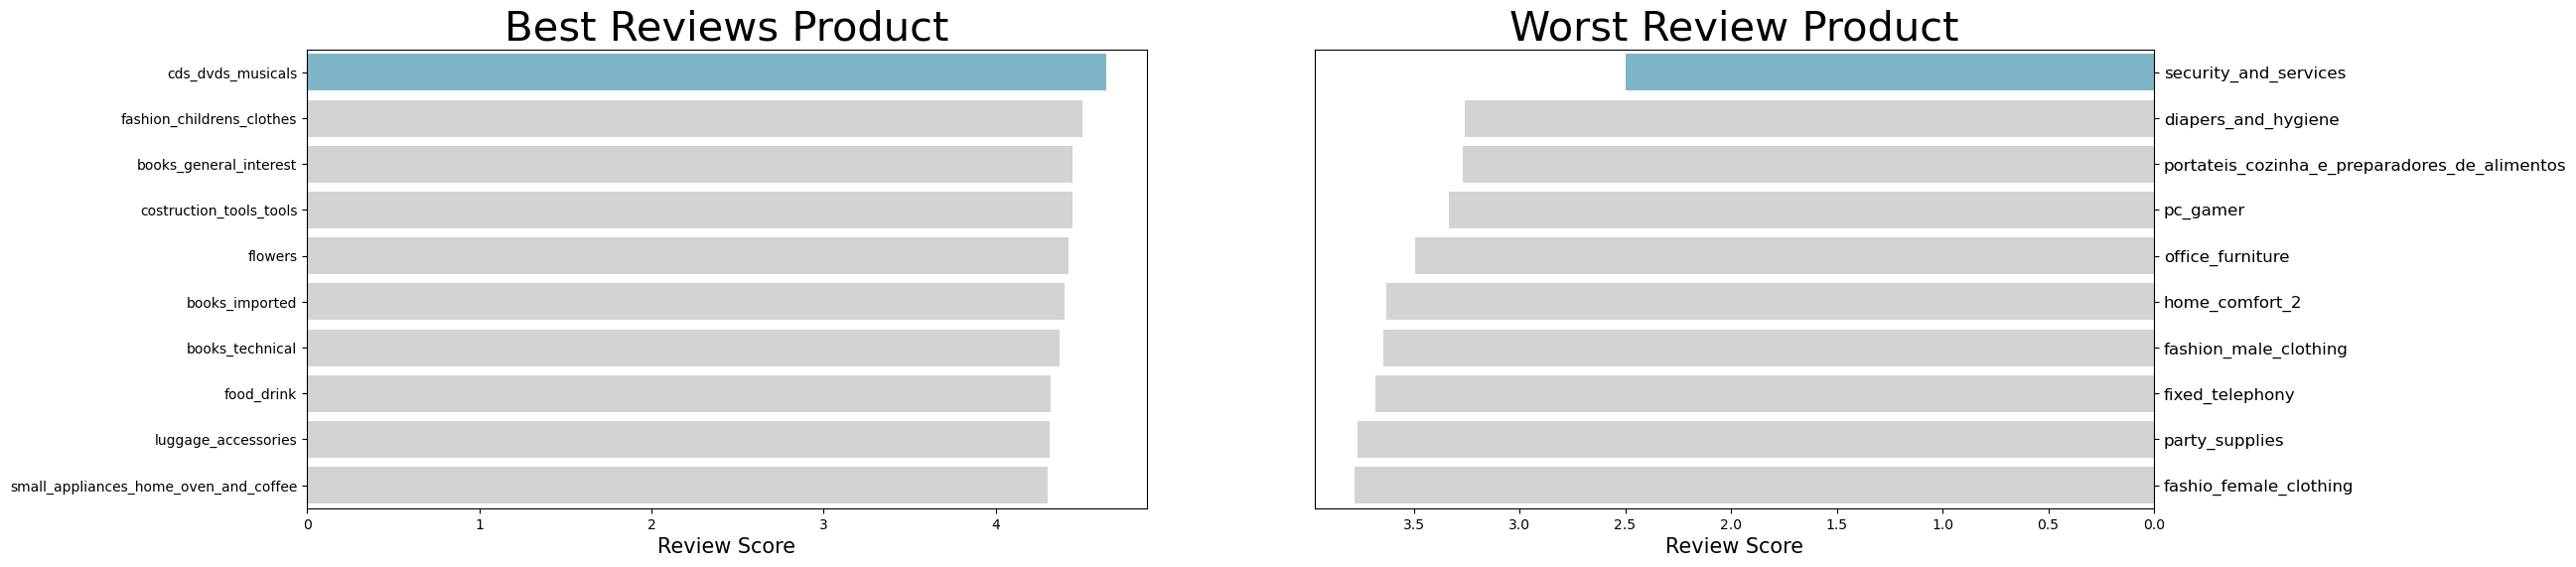

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24,6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x='review_score', y='product_category_name', data=best_reviews.head(10), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel("Review Score", fontsize=15)
ax[0].set_title("Best Reviews Product", loc="center", fontsize=30)

sns.barplot(x='review_score', y='product_category_name', data=worst_reviews.head(10), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel("Review Score", fontsize=15)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Review Product", loc="center", fontsize=30)
ax[1].tick_params(axis='y', labelsize=12)

### Pertanyaan 2: Kategori Produk apa yang memiliki penjualan tertinggi dalam periode tertentu?

In [59]:
total_revenue = all_orders_df.groupby(by='product_category_name').agg({
    'price' : 'sum'
    })
total_revenue.head()

,price
product_category_name,
Unknown,179027.48
agro_industry_and_commerce,72530.47
air_conditioning,54330.06
art,24037.74
arts_and_craftmanship,1814.01


In [60]:
# Kategori Produk penjualan tertinggi (delivered) pada tahun terakhir (2018)
high_order_2018 = all_orders_df[all_orders_df['order_year'] == 2018].groupby(by='product_category_name').agg({
    'order_id' : 'nunique',
    'price' : 'sum'
}).sort_values(by='order_id', ascending=False)

high_order_2018.head()

,order_id,price
product_category_name,,
health_beauty,5430,774821.59
bed_bath_table,5078,562039.62
sports_leisure,4121,539832.75
computers_accessories,4080,521322.23
watches_gifts,3534,711314.70


C:\Users\Ricardo\AppData\Local\Temp\ipykernel_15812\3267919650.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='order_id', y='product_category_name', data=high_order_2018.head(5), palette=colors)


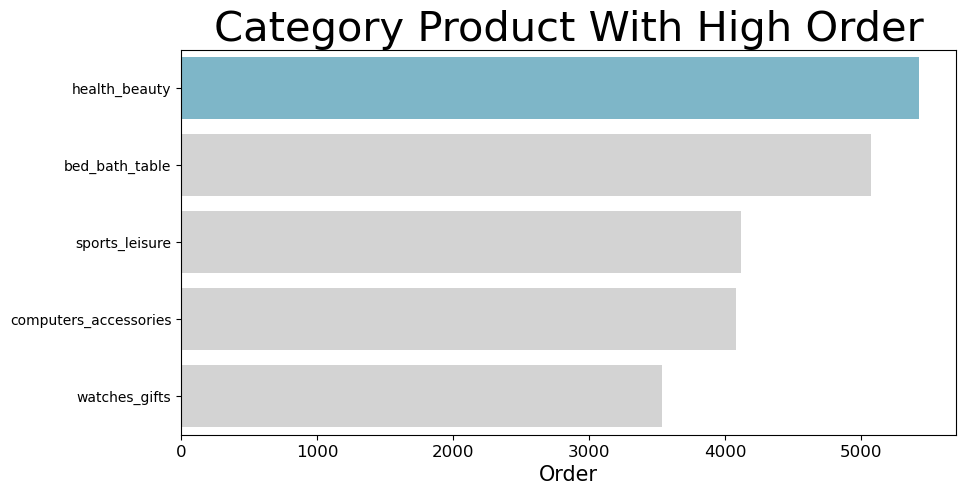

In [61]:
plt.figure(figsize=(10,5))
colors = colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(x='order_id', y='product_category_name', data=high_order_2018.head(5), palette=colors)
plt.title('Category Product With High Order', size=30)
plt.xlabel('Order', size=15)
plt.ylabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

In [62]:
product_sold = all_orders_df[all_orders_df['order_status'] == 'delivered'].groupby(by='product_category_name').agg({
    'order_id':'nunique'
    })
product_sold.head()

,order_id
product_category_name,
Unknown,1382
agro_industry_and_commerce,177
air_conditioning,242
art,193
arts_and_craftmanship,23


###Pertanyaan 3: Total Revenue yang didapat?

In [63]:
total_revenue = all_orders_df.groupby(by='product_category_name').agg({
    'price' : 'sum'
    })
total_revenue = total_revenue.reset_index()
total_revenue.rename(columns = {'price' : 'total'
    }, inplace = True)
total_revenue.head()

,product_category_name,total
0,Unknown,179027.48
1,agro_industry_and_commerce,72530.47
2,air_conditioning,54330.06
3,art,24037.74
4,arts_and_craftmanship,1814.01


###Pertanyaan 4: Total Produk yang terjual?

In [64]:
product_sold = all_orders_df[all_orders_df['order_status'] == 'delivered'].groupby(by='product_category_name').agg({
    'order_id':'nunique'
    })
product_sold = product_sold.reset_index()
product_sold.rename(columns = {'order_id' : 'total'
    }, inplace = True)
product_sold.head()

,product_category_name,total
0,Unknown,1382
1,agro_industry_and_commerce,177
2,air_conditioning,242
3,art,193
4,arts_and_craftmanship,23


###Pertanyaan 5: Total Order yang dilakukan?

In [65]:
total_orders = all_orders_df.groupby(by='product_category_name').agg({
    'order_id' : 'nunique'
    })
total_orders = total_orders.reset_index()
total_orders.rename(columns = {'order_id' : 'total'
    }, inplace = True)
total_orders.head()

,product_category_name,total
0,Unknown,1439
1,agro_industry_and_commerce,182
2,air_conditioning,249
3,art,200
4,arts_and_craftmanship,23


**Insight:**
- Didapat bahwa kategori produk cds_dvds_musicals	menjadi kategori produk dengan review score tertinggi sebesar 4.64 dengan terjual 12 produk. Lalu dilanjut oleh fashion_childrens_clothes	review score sebesar 4.5 terjual 8 produk, books_general_interest	4.44 terjual 508 produk, costruction_tools_tools 4.44 terjual 94 produk, dan flowers 4.41 terjual 28 produk.

- Lalu dengan kategori produk terburuk didapat bahwa security_and_services menjadi kategori produk terburuk review scorenya yaitu 2.25, lalu ada diapers_and_hygiene, portateis_cozinha_e_preparadores_de_alimentos, pc_gamer dan office_furniture dengan review score kurang lebih 3.0.

- Lalu ada kategori produk dengan penjualan tertinggi yaitu kategori produk health_beauty sebesar 5430 produk terjual dengan penghasilan sebesar 774,821.59, lalu ada bed_bath_table sebesar 5078 produk terjual dengan penghasilan sebesar 562,039.62, sports_leisure sebesar 4121 produk terjual dengan penghasilan 539,832.75, computers_accessories	sebesar 4080 produk terjuan dengan penghasilan 521,322.23, dan watches_gifts	sebesar 3534	produk terjual dengan penghasilan 711,314.70.

## RFM Analysis

- Recency = melihat kapan terakhir seorang pelanggan melakukan transaksi.
- Frequency = mengidentifikasi seberapa sering seorang pelanggan melakukan transaksi.
- Monetary = mengidentifikasi seberapa besar revenue yang berasal dari pelanggan tersebut.

In [66]:
rfm_df = all_orders_df.groupby(by = 'customer_id', as_index=False).agg({
    'order_delivered_customer_date' : 'max',
    'order_id' : 'nunique',
    'price' : 'sum'
})

rfm_df.columns = ['customer_id', 'max_order_timestamp', 'frequency', 'monetary']
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,2017-11-28 15:41:30,1,89.80
1,000161a058600d5901f007fab4c27140,2017-07-25 18:57:33,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,2017-03-06 08:57:49,1,179.99
3,0002414f95344307404f0ace7a26f1d5,2017-09-13 20:06:02,1,149.90
4,000379cdec625522490c315e70c7a9fb,2018-04-13 20:21:08,1,93.00


In [67]:
# memastikan 'order_estimated_delivery_date' di orders_dataset_df adalah datetime
orders_dataset_df['order_delivered_customer_date'] = pd.to_datetime(orders_dataset_df['order_delivered_customer_date'])
# mengubah 'max_order_timestamp' menjadi datetime
rfm_df['max_order_timestamp'] = pd.to_datetime(rfm_df['max_order_timestamp'])

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df['max_order_timestamp'] = rfm_df['max_order_timestamp'].dt.date
recent_date = orders_dataset_df['order_delivered_customer_date'].max().date()
rfm_df = rfm_df[rfm_df['max_order_timestamp'].notna()]
rfm_df['recency'] = rfm_df['max_order_timestamp'].apply(lambda x: (recent_date - x).days)
rfm_df.drop('max_order_timestamp', axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,323
1,000161a058600d5901f007fab4c27140,1,54.90,449
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,590
3,0002414f95344307404f0ace7a26f1d5,1,149.90,399
4,000379cdec625522490c315e70c7a9fb,1,93.00,187


C:\Users\Ricardo\AppData\Local\Temp\ipykernel_15812\1522218804.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='recency', x='customer_id', data=rfm_df.sort_values('recency', ascending=True).head(5), palette=colors, ax=ax[0])
C:\Users\Ricardo\AppData\Local\Temp\ipykernel_15812\1522218804.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
C:\Users\Ricardo\AppData\Local\Temp\ipykernel_15812\1522218804.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fal

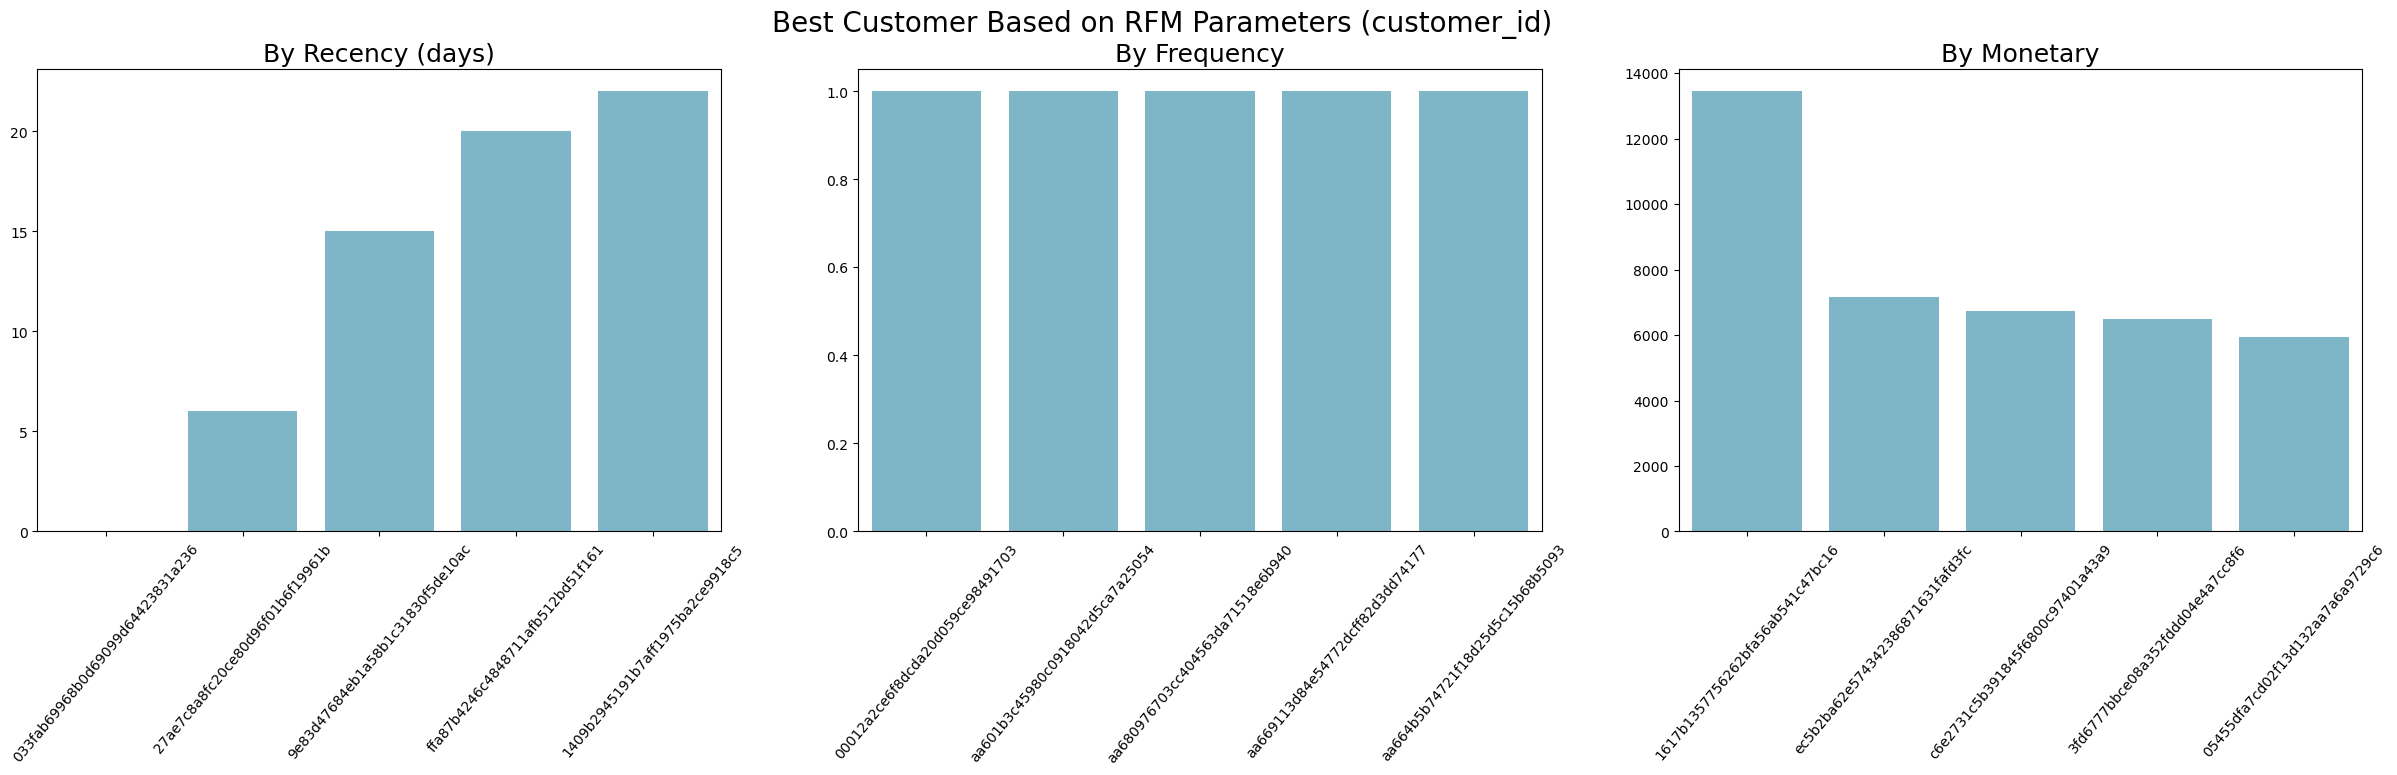

In [68]:
fig, ax= plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y='recency', x='customer_id', data=rfm_df.sort_values('recency', ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=10, rotation=50)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=10, rotation=50)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=10, rotation=50)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

## Conclusion

- Conclution Kategori Produk apa yang memiliki review terbaik dan terburuk?

  Ada korelasi yang kuat antara review tinggi dan kualitas produk yang baik atau kepuasan pelanggan. Perusahaan perlu mempertahankan kualitas produk pada kategori "cds_dvds_musicals" dan melakukan perbaikan pada kategori "security_and_services". Untuk meningkatkan review pada kategori "security_and_services", perusahaan perlu lebih fokus pada kepuasan pelanggan dengan meningkatkan kualitas layanan dan responsivitas terhadap keluhan.

- Conclution Kategori Produk apa yang memiliki penjualan tertinggi dalam periode tertentu?

  Kategori "health_beauty" memiliki strategi pemasaran yang efektif, terbukti dengan penjualan yang tinggi. Perusahaan dapat mempelajari strategi pemasaran yang berhasil pada kategori ini dan menerapkannya pada kategori lain. Kategori "watches_gifts" menarik karena memiliki pendapatan yang tinggi meskipun jumlah produk yang terjual tidak setinggi kategori lainnya. Hal ini mengindikasikan bahwa produk dalam kategori ini memiliki harga jual yang lebih tinggi. Perusahaan dapat mempertimbangkan untuk memperluas portofolio produk dengan margin keuntungan yang lebih tinggi.

In [69]:
all_orders_df.to_csv('all_orders_df.csv', index=False)

In [70]:
all_orders_df.head()

,product_id,product_category_name,order_id,order_item_id,seller_id,price,freight_value,review_id,review_score,customer_id,order_status,order_delivered_customer_date,customer_city,order_year
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,10.91,7.39,d71da8fd8c6e3adef26be965f065b8a1,5,f8a3e963a310aa58b60a5b1fed5bceb5,delivered,2018-04-27 16:42:17,mogi-guacu,2018.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,248.00,17.99,19866247db89845ef558ef19a6c26fcd,5,03fc97548af8f58fefc768d12b546c9c,delivered,2018-02-16 13:27:08,rio de janeiro,2018.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,79.80,7.82,32921b4e09c9a19d61fe46ce04231b84,5,e41819d1c95c12c9ce495b630eab8aee,delivered,2018-07-11 23:24:16,sao paulo,2018.0
3,cef67bcfe19066a932b7673e239eb23d,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,112.30,9.54,70949d129965fb1ee32aaccec720a19e,1,322162b5ca010c2b059cb5224dd818b1,delivered,2018-08-06 15:14:32,sao paulo,2018.0
4,9dc1a7de274444849c219cff195d0b71,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,37.90,8.29,74c9c7d0bc153bbbc92e4c1597b8ba55,5,c11c31965ff02cc1d7132df8edfcbc22,delivered,2018-04-13 22:41:44,sao paulo,2018.0
